`dictcomp` 可從任何 iterable 接收 key:value 來建構 `dict` 實例

In [1]:
dial_codes = [
    (822, '阿蓮區'),
    (833, '鳥松區'),
    (845, '內門區'),
    (843, '美濃區'),
    (844, '六龜區'),
]

In [4]:
city_dial =  { city: code for code, city in dial_codes }

In [5]:
city_dial

{'阿蓮區': 822, '鳥松區': 833, '內門區': 845, '美濃區': 843, '六龜區': 844}

### unpack mapping

In [6]:
def dump(**kwargs):
    return kwargs

In [7]:
dump(**{'x': 1, 'y': 3, **{'z': 4}})

{'x': 1, 'y': 3, 'z': 4}

In [9]:
{**{'x': 1, 'y': 3, **{'x': 4}}} # key 可重複，但後值複寫前面

{'x': 4, 'y': 3}

## Merge mapping

In [10]:
d1 = {'a': 1, 'b': 5}
d2 = {'a': 2, 'b': 1, 'c': 9}

In [11]:
d1 | d2

{'a': 2, 'b': 1, 'c': 9}

In [12]:
d2 | d1

{'a': 1, 'b': 5, 'c': 9}

##  Pattern Matching with Mappings

match/case 模式是支援 mapping 物件比對。

模式比對很適合處理嵌套的 mapping 與 sequence 等結構。在場景上，經常從 JSON API 或半結構化 schema 的資料庫讀取。

In [3]:
def get_creators(record: dict) -> list: 
    match record: 
        case {'type': 'book', 'api': 2, 'authors': [*names]}:   
            return names 
        case {'type': 'book', 'api': 1, 'author': name}:   
            return [name] 
        case {'type': 'book'}:   
            raise ValueError(f"Invalid 'book' record: {record!r}") 
        case {'type': 'movie', 'director': name}:   
            return [name] 
        case _:   
            raise ValueError(f'Invalid record: {record!r}')

In [4]:
b1 = dict(api=1, author='Naruto', type='book', title='Naruto')
get_creators(b1) 

['Naruto']

In [5]:
from collections import OrderedDict

In [7]:
b2 = OrderedDict(api=2, type='book', title='Harry Potter',  authors='J·K·羅琳、J. K. Rowling'.split('、'))
get_creators(b2)

['J·K·羅琳', 'J. K. Rowling']

In [8]:
get_creators({'type': 'book', 'pages': 770})

ValueError: Invalid 'book' record: {'type': 'book', 'pages': 770}

### Mapping 型態 API
`collections.abc` 提供 `Mapping` 和 `MutableMapping ABC` 來定義 dict 的介面

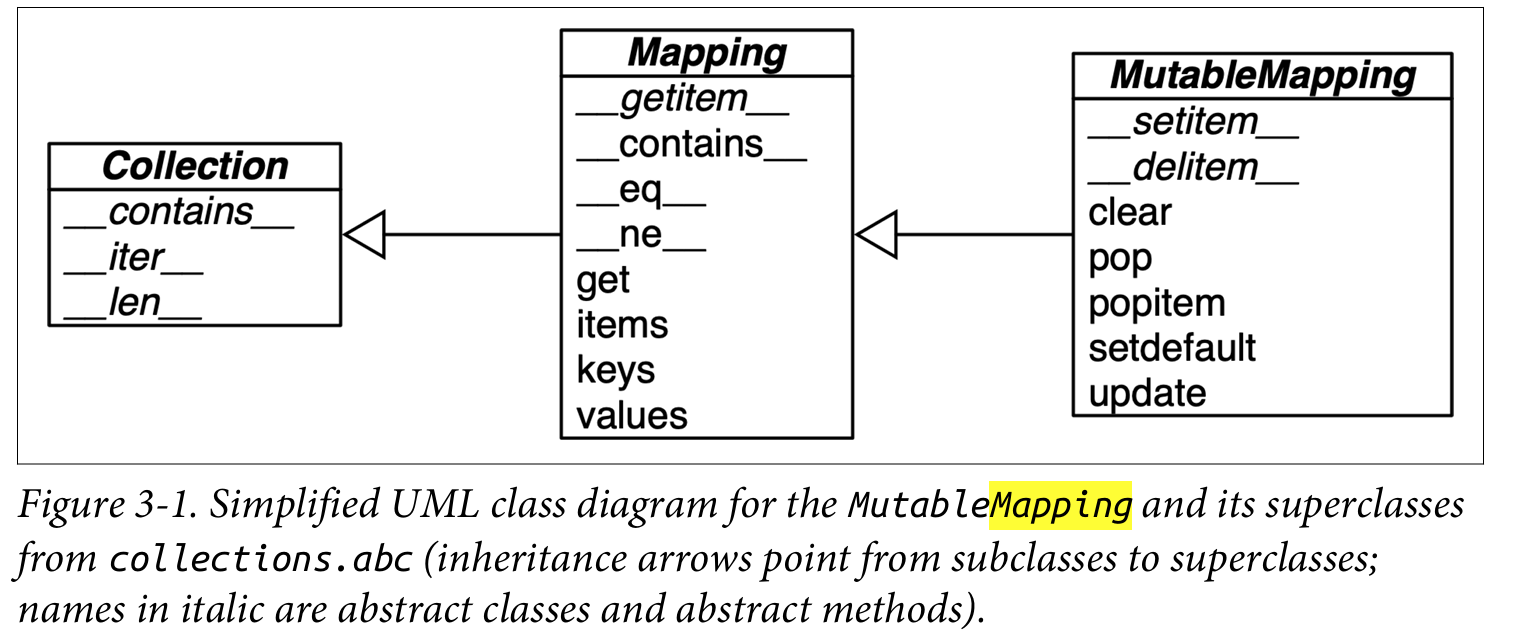

ABC 主要價值是紀錄與規範 mapping 的標準介面。

自訂 mapping 時，比較簡單方法是 `extend collections.UserDict` 或是使用*組合*來包裝 dict。  

In [1]:
from collections import abc
my_dict = {}

print(isinstance(my_dict, abc.Mapping))
print(isinstance(my_dict, abc.MutableMapping))

True
True


常用 mapping

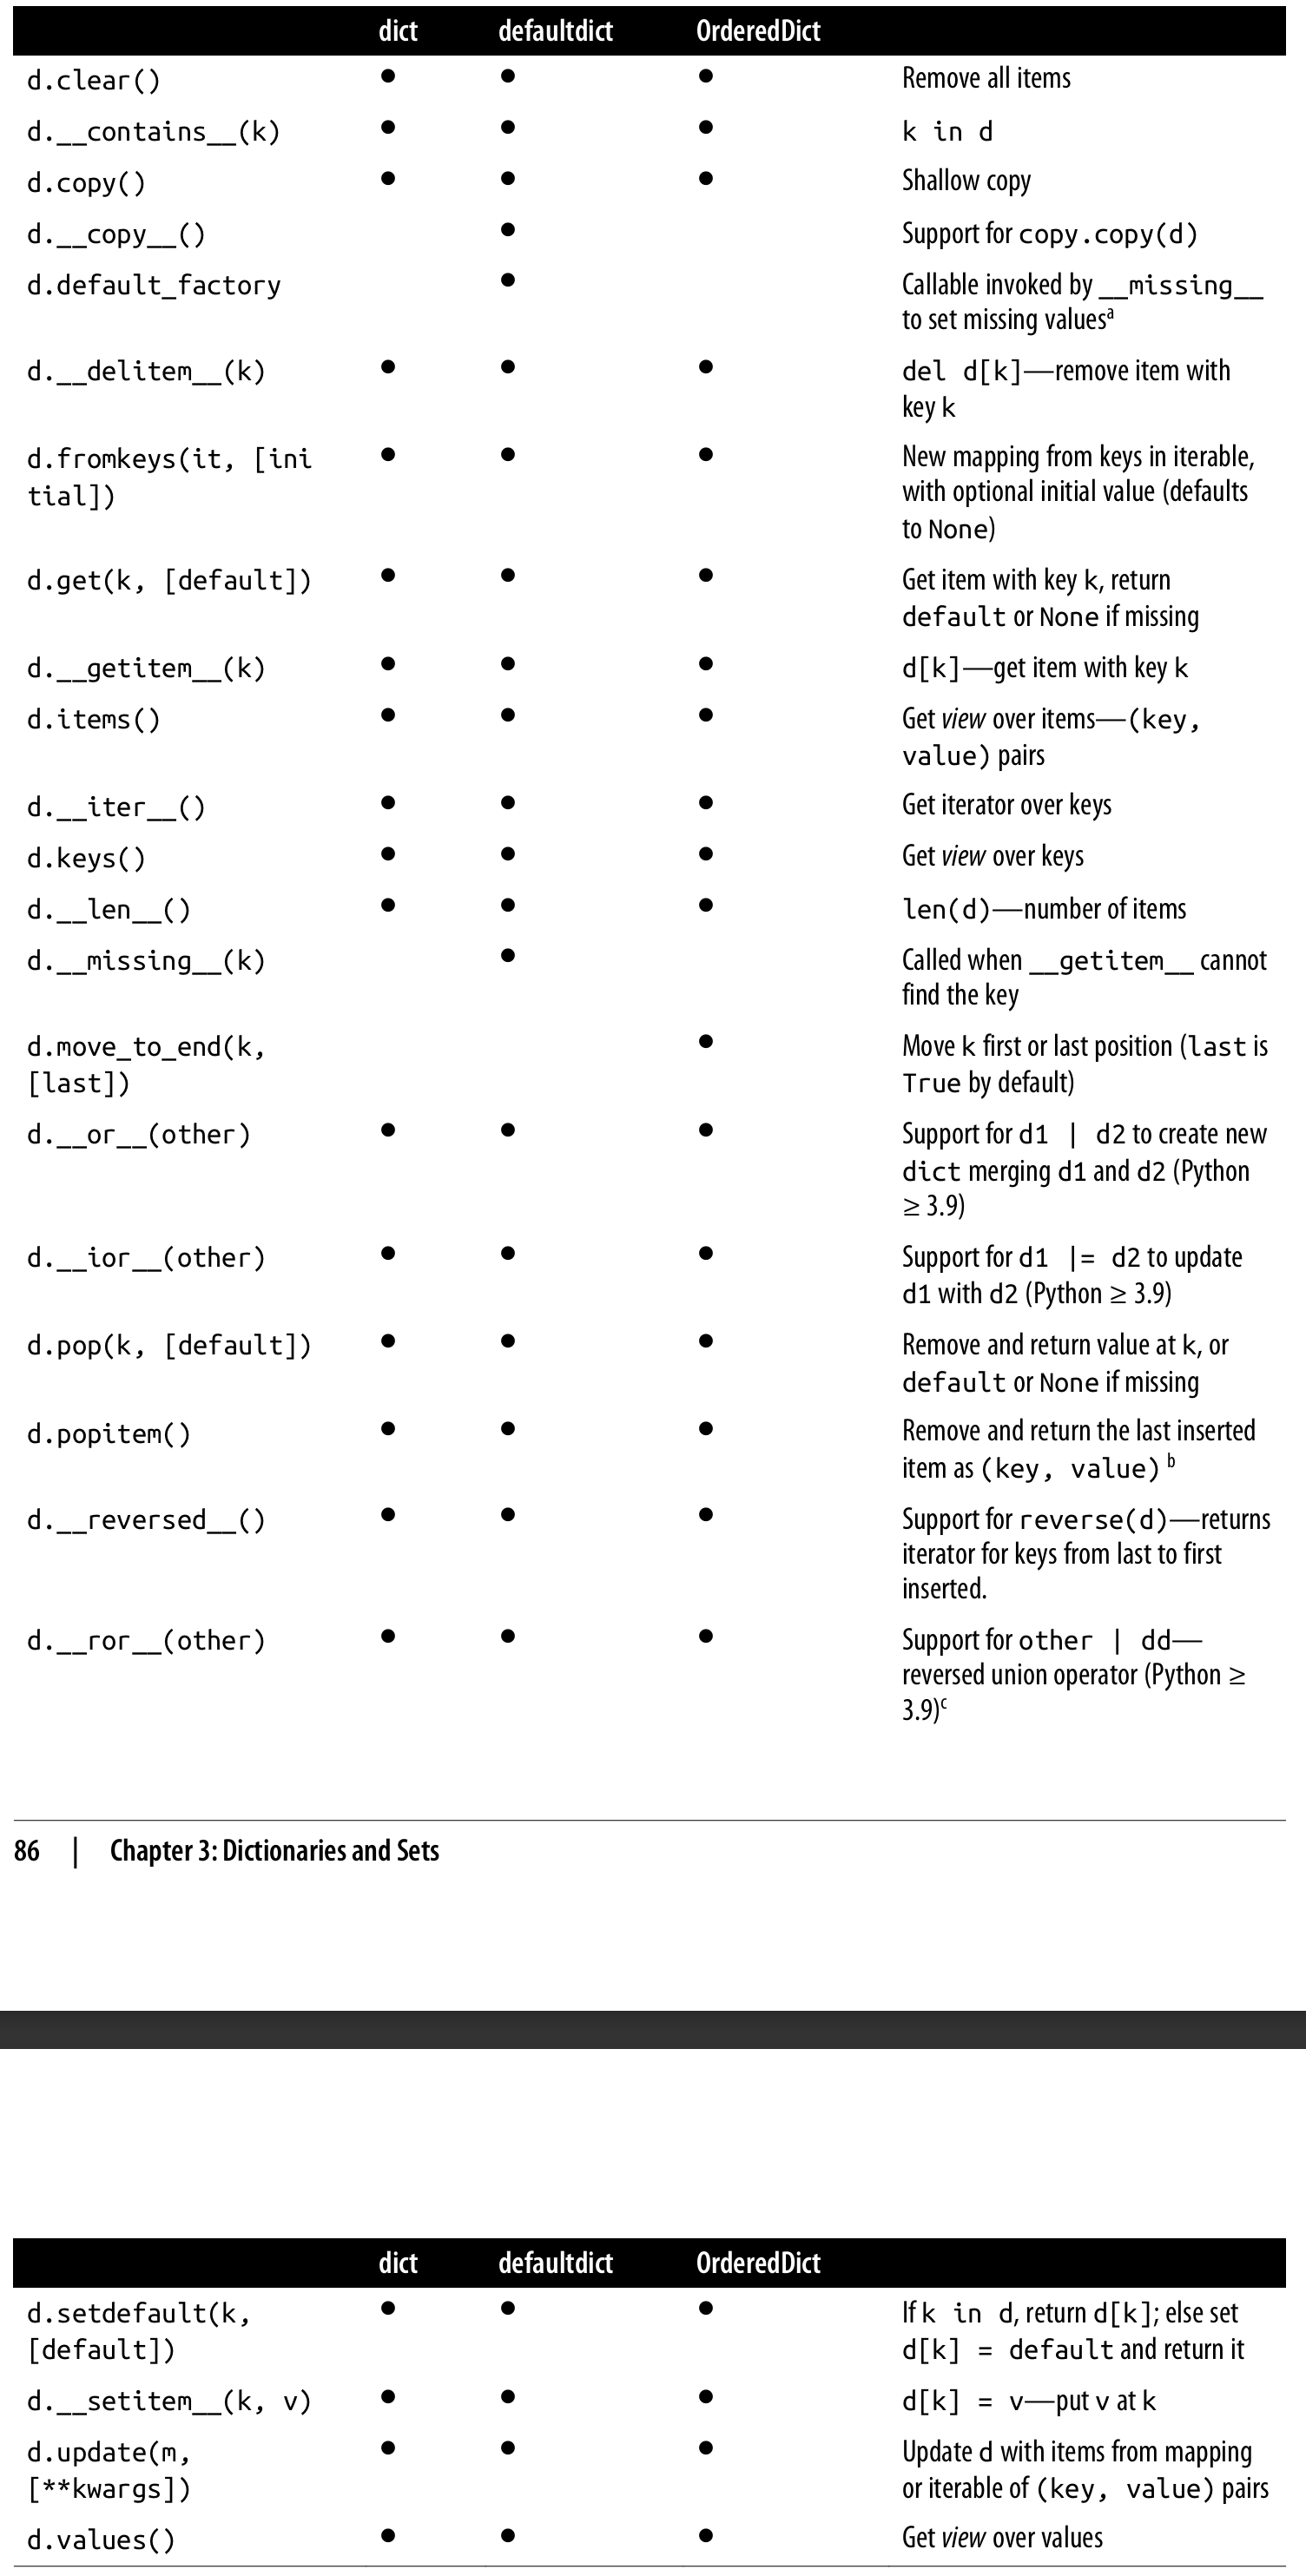

```python
my_dict.setdefault(key, []).append(new_value)
```
等價於

```python
if key not in my_dict:
    my_dict[key] = []
my_dict[key].append(new_value)
```

但 `setdefault` 只要搜尋一次 key